In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Lahari\noumi-1\Back_End\Database\synthetic_transactions_5001.csv") 
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                         transaction_id                            account_id  \
0  6002769c-ad28-459b-a39b-93667fdb8088  df505d3f-7f2d-47a2-887a-ff497b378af4   
1  5a43bfc4-dcb9-4b30-a118-054fcc973074  46520dcd-d7a1-46b8-b5ed-ebd1417065f3   
2  d686f4a8-9d41-4650-8001-f8528a1cc072  4945bd8e-046f-4968-b7cc-83e9c3fd413b   
3  9d16bc58-2ff9-4c99-af14-0878235cba40  cdf4dd84-1e8f-44c1-a4da-4610c66f11ea   
4  60ce6ff6-758c-4ef1-ab07-93d9efefe564  c7f61627-67ac-4dcd-bc33-6fe03f32a1bc   

   amount        date merchant_name                           category  \
0  423.52  2024-01-25     Starbucks  ['Food and Drink', 'Coffee Shop']   
1  385.14  2024-01-05     Starbucks  ['Food and Drink', 'Coffee Shop']   
2  398.81  2024-01-06    McDonald's  ['Food and Drink', 'Restaurants']   
3  414.83  2023-12-14         Apple            ['Tech', 'Electronics']   
4  485.56  2023-06-07    McDonald's  ['Food and Drink', 'Restaurants']   

           description   mcc  
0   Star

In [3]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  5000 non-null   object 
 1   account_id      5000 non-null   object 
 2   amount          5000 non-null   float64
 3   date            5000 non-null   object 
 4   merchant_name   5000 non-null   object 
 5   category        5000 non-null   object 
 6   description     5000 non-null   object 
 7   mcc             5000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 312.6+ KB
None


In [4]:
# Summary statistics
print("\n Summary Statistics:")
print(df.describe())


 Summary Statistics:
            amount          mcc
count  5000.000000  5000.000000
mean    251.166014  5461.546200
std     144.259033   513.763733
min       2.570000  4121.000000
25%     125.390000  5311.000000
50%     254.540000  5541.000000
75%     374.595000  5814.000000
max     499.850000  5912.000000


In [5]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
transaction_id    0
account_id        0
amount            0
date              0
merchant_name     0
category          0
description       0
mcc               0
dtype: int64


In [6]:
# Check for duplicate rows
print("\n Duplicate Rows:", df.duplicated().sum())


 Duplicate Rows: 0


In [7]:
# Check unique categories
print("\n Unique Categories:")
print(df['category'].value_counts())


 Unique Categories:
category
['Travel', 'Ride Sharing']           542
['Travel', 'Gas Stations']           523
['Shops', 'Wholesale Clubs']         512
['Food and Drink', 'Restaurants']    500
['Shops', 'Online']                  496
['Shops', 'Supermarkets']            496
['Shops', 'Department Stores']       492
['Food and Drink', 'Coffee Shop']    481
['Tech', 'Electronics']              479
['Health', 'Pharmacy']               479
Name: count, dtype: int64


In [8]:
# Check unique merchants
print("\n Top 10 Merchants by Frequency:")
print(df['merchant_name'].value_counts().head(10))


 Top 10 Merchants by Frequency:
merchant_name
Uber            542
Shell           523
Costco          512
McDonald's      500
Amazon          496
Walmart         496
Target          492
Starbucks       481
Apple           479
CVS Pharmacy    479
Name: count, dtype: int64


In [9]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

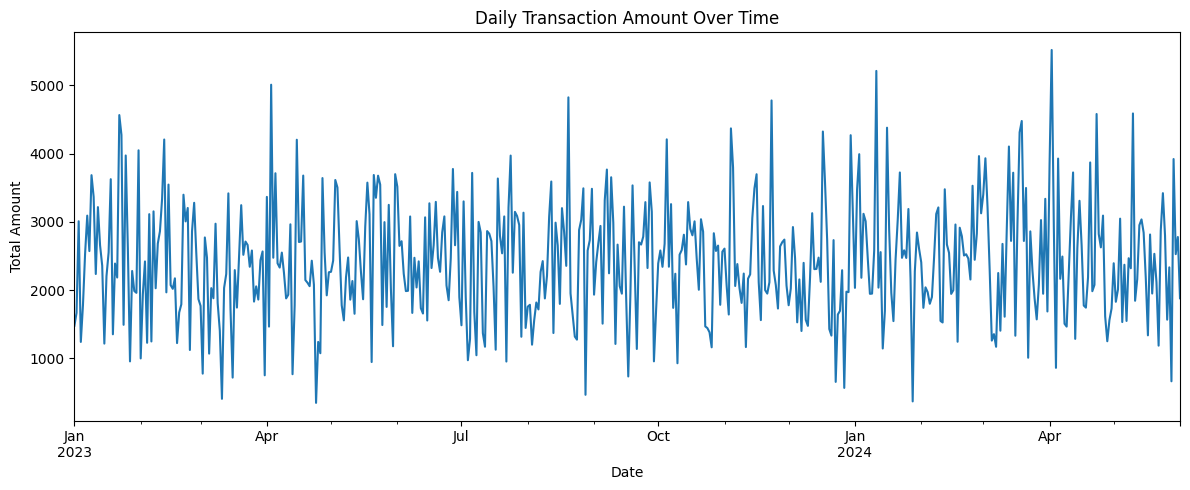

In [10]:
# Plotting transaction amounts over time
plt.figure(figsize=(12, 5))
df.set_index('date')['amount'].resample('D').sum().plot()
plt.title("Daily Transaction Amount Over Time")
plt.xlabel("Date")
plt.ylabel("Total Amount")
plt.tight_layout()
plt.show()

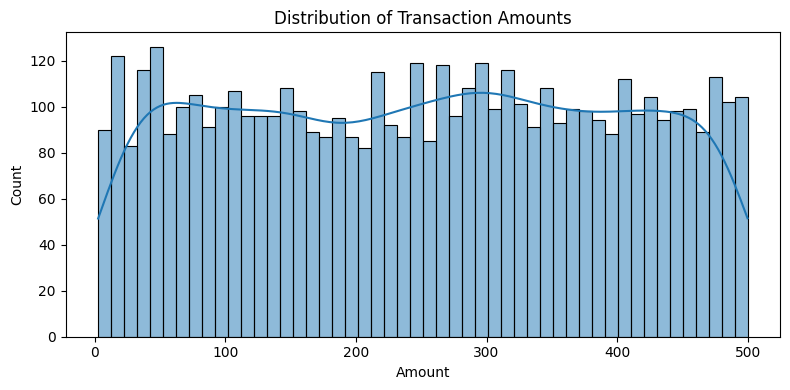

In [11]:
# Distribution of transaction amounts
plt.figure(figsize=(8, 4))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.tight_layout()
plt.show()

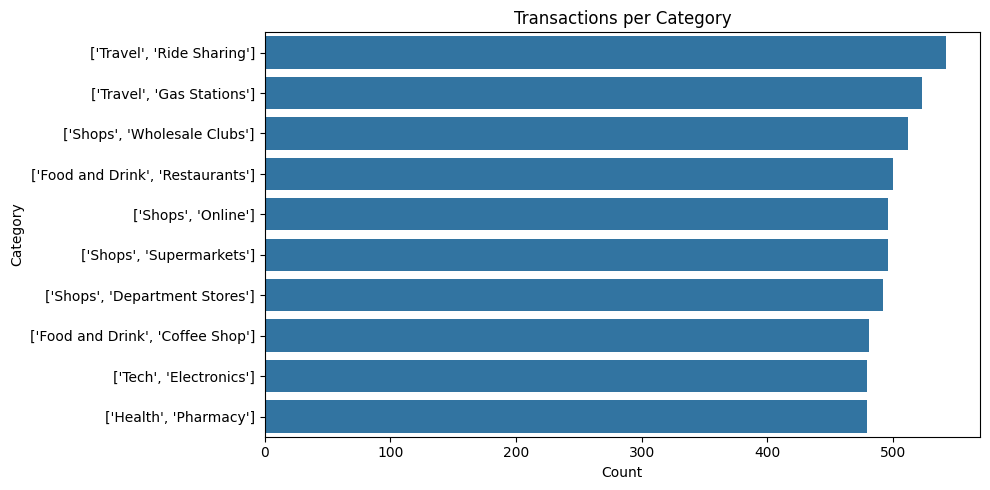

In [12]:
# Transaction count per category
plt.figure(figsize=(10, 5))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title("Transactions per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

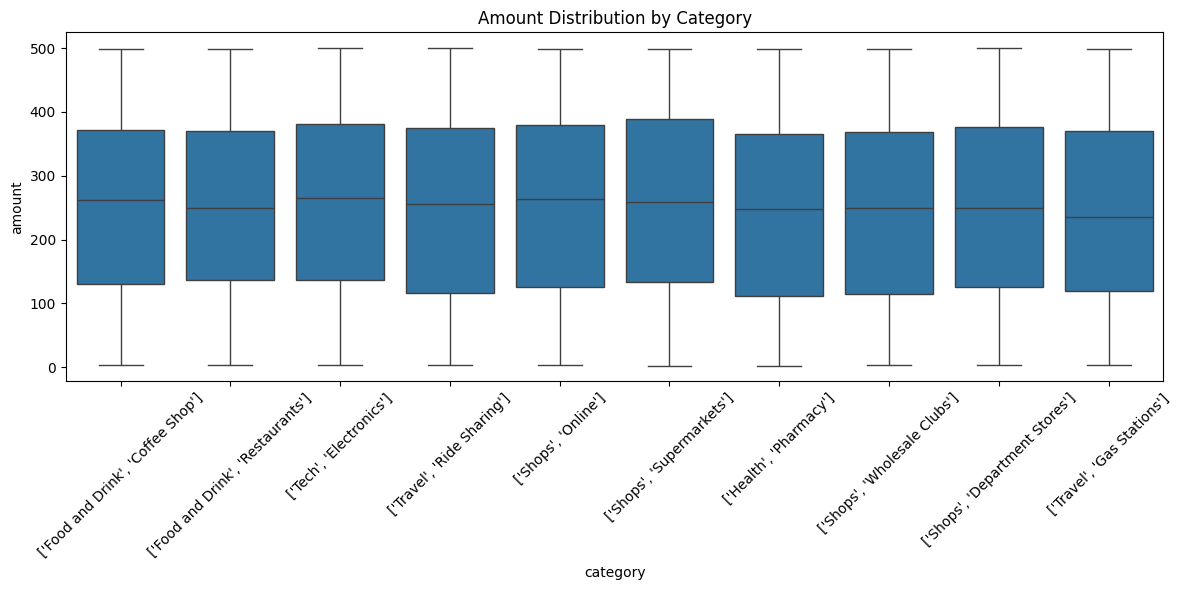

In [13]:
# Boxplot of transaction amount by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amount', data=df)
plt.xticks(rotation=45)
plt.title("Amount Distribution by Category")
plt.tight_layout()
plt.show()

In [14]:
# MCC code analysis
print("\nMCC code frequency:")
print(df['mcc'].value_counts().head(10))


MCC code frequency:
mcc
4121    542
5541    523
5300    512
5812    500
5818    496
5411    496
5311    492
5814    481
5732    479
5912    479
Name: count, dtype: int64


In [15]:
import pandas as pd
import ast
df['date'] = pd.to_datetime(df['date'])

# Time-Based Features
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [16]:
# Extract Primary Category
# Convert string to list and get first category
df['primary_category'] = df['category'].apply(lambda x: ast.literal_eval(x)[0])

In [17]:
# Rolling Spend per Account (7-day window)
df = df.sort_values(by=['account_id', 'date'])

# Calculate rolling amount (sum over last 7 days for each account)
df['rolling_spend_7d'] = df.groupby('account_id')['amount']\
    .transform(lambda x: x.rolling(window=7, min_periods=1).mean())

In [18]:
# Previous Transaction Amount
df['prev_transaction_amt'] = df.groupby('account_id')['amount'].shift(1)

# Fill NaN with 0 for first transaction
df['prev_transaction_amt'] = df['prev_transaction_amt'].fillna(0)

In [19]:
# Drop unnecessary columns 
cols_to_drop = ['transaction_id', 'account_id', 'description', 'merchant_name', 'category', 'mcc']
df_model = df.drop(columns=cols_to_drop).copy()

In [20]:
# Work on a copy of the original df
df_model = df.copy()

# Convert 'date' to datetime
df_model['date'] = pd.to_datetime(df_model['date'])

# Feature: Day of week
df_model['day_of_week'] = df_model['date'].dt.day_name()

# Feature: Is weekend
df_model['is_weekend'] = df_model['day_of_week'].isin(['Saturday', 'Sunday'])


In [21]:
# Simulate hour, create time bucket
import numpy as np
np.random.seed(42)
df_model['hour'] = np.random.randint(0, 24, df_model.shape[0])
df_model['local_time_bucket'] = pd.cut(df_model['hour'],
    bins=[-1, 6, 12, 17, 21, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Late Night']
)
df_model.drop(columns=['hour'], inplace=True)

In [22]:
# Feature: Previous transaction amount
df_model['prev_transaction_amt'] = df_model.groupby('account_id')['amount'].shift(1)
df_model['prev_transaction_amt'] = df_model['prev_transaction_amt'].fillna(0)


In [23]:
# Drop non-useful columns 
cols_to_drop = ['transaction_id', 'account_id', 'description', 'merchant_name', 'category', 'mcc']
df_model.drop(columns=cols_to_drop, inplace=True)

In [24]:
# One-hot encode categorical fields
df_model = pd.get_dummies(df_model, columns=['day_of_week', 'local_time_bucket', 'is_weekend'])

In [25]:
# Save to CSV
df_model.to_csv("processed_5000.csv", index=False)
print("Done! Saved as 'processed_5000.csv'")

Done! Saved as 'processed_5000.csv'


In [26]:
from sklearn.ensemble import IsolationForest
import pandas as pd
df = pd.read_csv("processed_5000.csv")

# Drop non-numeric columns (like 'date') if present
non_numeric_cols = df.select_dtypes(include=['object']).columns
df = df.drop(columns=non_numeric_cols)

# Confirm all columns are numeric now
assert df.select_dtypes(include=['object']).shape[1] == 0, "Non-numeric columns remain!"

# Train model
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(df)

# Predict anomaly
df['anomaly'] = model.predict(df)

# Save or show sample output
print(df[['amount', 'anomaly']].head(10))


   amount  anomaly
0   20.55        1
1  236.52        1
2  112.85        1
3  486.49        1
4  455.29        1
5   94.17        1
6  132.13        1
7   41.81        1
8   81.02        1
9   47.84        1
